# Distribution of College Majors Across Tops Schools in America
Authors:  Rucha, Emma, Jiayuan

## Introduction

College students take multiple factors into consideration when choosing their majors. Some of these factors are ranking of majors in their college, potential future career path and salary, personal interest, etc. But are there any correlations between students' choices of major at top schools and the states that they study in? In this computational essay, we tried to explore the answer to this question and discuss the methods we used to anaylize the statistics of students' major choices in different states. 

**Question:** Is there a correlation between the choice of major by students at top colleges and the state they study in? 

Here, top colleges is defined as the top 10% of colleges in each state as ranked by Niche.com. Our goal for this project was to explore the comparision of different majors in top schools across different states and see whether there are any patterns that come to light. We looked at both comparing results for different states and observing patterns across America as a whole.

Understanding the correlation between state and popular major choice will explain to us how location, state policy and culture impact major choices in many colleges across America. This could potentially be useful for students who are applying for college by helping them gain insight into the distribution of learning resources across the US for different majors. Additionally, companies who are hiring for specific majors could understand whether there are certain locations to target their resources towards.

The three main steps we took in this project were web scrapping the data, cleaning and organizing the data, and visulizing the data for results. Each is documented in details in the sections below.
<br>
<br>
<br>
Here are the import statements for our code which will ensure the essay runs properly:

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

# import data_visualization

## Methodology
### 1. Scrapping Data
We scrapped our data by programmatically accessing pages from `niche.com`, a well-known college evaluation website (with the usage of an agent, time delays and a VPN to avoid being blocked by the website). 

We began by scraping the website for the college list for each state in the US. This included public and private schools as well as trade schools. For each state, we gathered the first page of results. From here, we found the total number of colleges displayed on Niche for each state and programmatically looped through the `top 10%` ranked colleges from the list to get the number of students in each major. The ranking provided by niche, although probably biased and not completely reflective of a college's true value, gives us a list of the overall more influencial schools in each state. The data extracted for each of the top 10% of schools in each state was saved into csv in the folder `raw_data`.

Each csv had a similar format with four columns: `State` , `Major` , `College` , `Student Number`.

In total, we recorded 324 majors in 575 colleges across 50 states.
<br>


### 2. Organizing Data

All of the organizing work was done through our `runner.py` file. 

We first began by concatenating every data file we had into a single file called `combined_data.csv`. This allowed us to more easily access the all of the data at once.

We manually sorted all the majors into 53 categories, which were organized into a dictionary. For example, majors like `Acting`, `Theatre Design`, `Dance`, and `Drama and Theatre Production` can be found under the key `Arts`.

To find all the majors for this sorting, we ran the following code:

In [11]:
df = pd.read_csv('raw_data/combined_data.csv')
unique_majors = df['Major'].unique()

print("First 10 majors are: ")
print(unique_majors[:10])
print("Total unique majors: " + str(len(unique_majors)))

First 10 majors are: 
['Biomedical Sciences and Molecular Medicine' 'Business' 'Finance'
 'Marketing' 'Exercise Physiology' 'Mechanical Engineering' 'Accounting'
 'Nursing' 'Psychology' 'Logistics and Supply Chain Management']
Total unique majors: 324


Three difference csvs were created to ease the visualization process. They were all placed in the folder `cleaned_data`. Processing the data as described below was done through Pandas: 

1. The first csv contained all the data from `combined_data.csv`, except that the major names were replaced with the broader categories that we had assigned. This was called `broader_major_combined_data.csv`

2. The second csv summed the number of students in each state that chose to major in a certain topic. For example, all the students in Alabama who majored in Psycology were summed together. This was saved as `broader_major_summed_data.csv`

3. The third csv summed the number of students who majored in a certain topic for all the states. For example, all the students in the US (all states from the list) were summed together. This was saved as `broader_major_whole_country.csv`

### 3. Visualizing Data

From the csvs created, we were able to use `matplotlib` to understand our results. From the three csvs listed above, we used the last two csvs (`broader_major_summed_data.csv` and `broader_major_whole_country.csv`). We took the data about the number of students in each state and across the country per major.

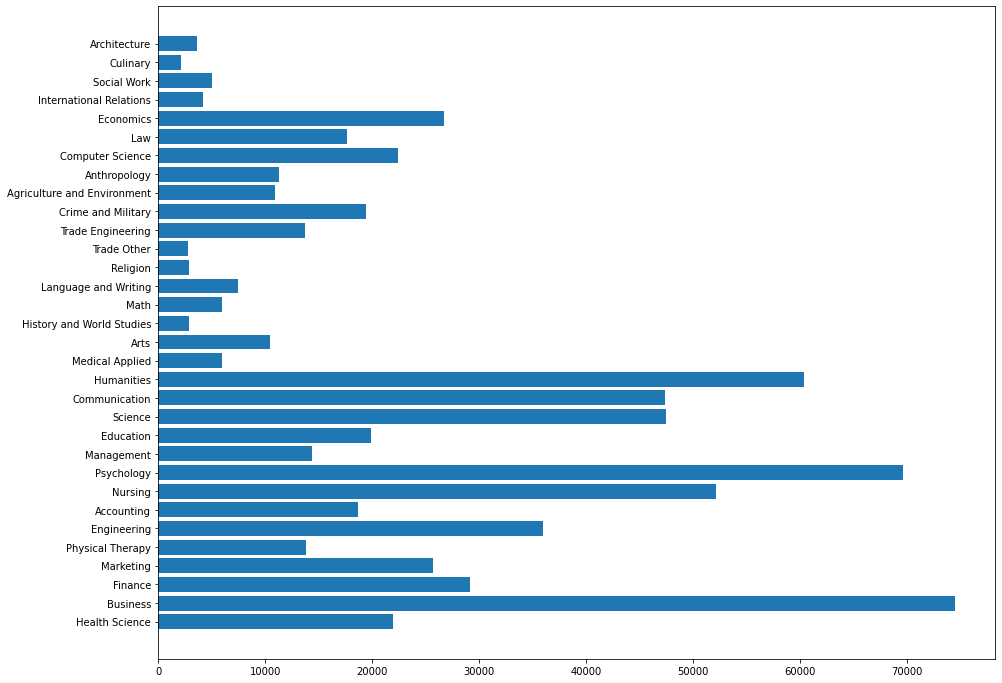

In [12]:
plt.rcParams ["figure.figsize"] = (15, 12) 
df = pd.read_csv ('cleaned_data/broader_major_whole_country.csv')
majors = df["Major"]
students = df["Students"]
plt.barh(majors,students)
plt.show()